<div style="text-align: center;">
  <h1 style="display: inline; border-bottom: 2px solid black; padding-bottom: 5px;">CA1 Data Cleaning and Preparation</h1>
</div>

<div style="text-align: center;">
  <h2>1. Data understanding</h2>
</div>

<div style="text-align: center;">
  <div style="display: inline-block;">
    <img src="imgs/2103533.png" alt="the data collect" width="50">
  </div>
  <h3 style="display: inline;">Gathering, exploration and describing the data</h3>
</div>

#### **Import libraries and packages, define functions**

First we need to import relevant Pyhton libraries and packages.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib.ticker import FuncFormatter

The function below allows us to format to format the values adding an 'M' that stands for millions or 'T' for thousands, for better visibility.

In [2]:
def millions_formatter(x, pos):
    return f'{x / 1e6} M'

def thousands_formatter(x, pos):
    return f'{x / 1e3} K'

def standard_decimal_notation_formatter(x):
    return '{:.2f}'.format(x)

#### **Load the dataset into a DataFrame**

Then, we need to load the dataset into a DataFrame. The first file I will work with is in a csv format and contains the data for the population of Ireland since 1926 to 2023.

In [3]:
population_df = pd.read_csv('PEA11.20231013T111046.csv')

#### **Explore data**

Displaying the first 10 rows of the data give us an overview and understanding of how the dataset is structured.

In [4]:
population_df.head(10)

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,PEA11,Population estimates from 1926,1926,1926,-,All ages,-,Both sexes,Number,2971992
1,PEA11,Population estimates from 1926,1926,1926,-,All ages,1,Male,Number,1506889
2,PEA11,Population estimates from 1926,1926,1926,-,All ages,2,Female,Number,1465103
3,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,-,Both sexes,Number,55391
4,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,1,Male,Number,28084
5,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,2,Female,Number,27307
6,PEA11,Population estimates from 1926,1926,1926,001,1 year,-,Both sexes,Number,55876
7,PEA11,Population estimates from 1926,1926,1926,001,1 year,1,Male,Number,28374
8,PEA11,Population estimates from 1926,1926,1926,001,1 year,2,Female,Number,27502
9,PEA11,Population estimates from 1926,1926,1926,002,2 years,-,Both sexes,Number,58273


In [5]:
population_df.tail(10)

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
11807,PEA11,Population estimates from 1926,2023,2023,096,96 years,2,Female,Number,1159
11808,PEA11,Population estimates from 1926,2023,2023,097,97 years,-,Both sexes,Number,1116
11809,PEA11,Population estimates from 1926,2023,2023,097,97 years,1,Male,Number,295
11810,PEA11,Population estimates from 1926,2023,2023,097,97 years,2,Female,Number,821
11811,PEA11,Population estimates from 1926,2023,2023,098,98 years,-,Both sexes,Number,829
11812,PEA11,Population estimates from 1926,2023,2023,098,98 years,1,Male,Number,197
11813,PEA11,Population estimates from 1926,2023,2023,098,98 years,2,Female,Number,632
11814,PEA11,Population estimates from 1926,2023,2023,646,99 years and over,-,Both sexes,Number,1600
11815,PEA11,Population estimates from 1926,2023,2023,646,99 years and over,1,Male,Number,352
11816,PEA11,Population estimates from 1926,2023,2023,646,99 years and over,2,Female,Number,1248


By taking a look at the first 10 rows of the data we can have the following conclusion: 
- We have categorical variables - STATISTICS, STATISTIC Label, TLIST(A1)
- We have numerical variables - Year, C02076V03371 (identifier for the age group), C02199V02655 (code/identifier for the sex), VALUE
- We have qualitative variables - Age Group, Sex, Unit

#### **Access the size of the dataset**

Get a sense of how large the dataset is. 

In [6]:
population_size = population_df.size

print("There are", population_size, "values in total across the whole dataset")

There are 118170 values in total across the whole dataset


#### **Determine the shape of the dataset**

The shape() property returns a tuple representing total number of columns and rows we have in the dataset.

In [7]:
population_df.shape

(11817, 10)

#### **Get basic information about the dataset**

To further understand the dataset, we use the info() function which gives us basic information about the dataset, including the data type of values in each column.

In [8]:
#using the info() function so that we can check and understand the structure of the DataFrame and gain insights into the data it contains.
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC           11817 non-null  object
 1   STATISTIC Label     11817 non-null  object
 2   TLIST(A1)           11817 non-null  int64 
 3   Year                11817 non-null  int64 
 4   C02076V03371        11817 non-null  object
 5   Single Year of Age  11817 non-null  object
 6   C02199V02655        11817 non-null  object
 7   Sex                 11817 non-null  object
 8   UNIT                11817 non-null  object
 9   VALUE               11817 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 923.3+ KB


#### **Dropping irrelevant columns and renaming the labeled columns**

In [9]:
population_df = population_df.drop(['STATISTIC', 'STATISTIC Label', 'TLIST(A1)'], axis=1)
population_df

,Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,1926,-,All ages,-,Both sexes,Number,2971992
1,1926,-,All ages,1,Male,Number,1506889
2,1926,-,All ages,2,Female,Number,1465103
3,1926,200,Under 1 year,-,Both sexes,Number,55391
4,1926,200,Under 1 year,1,Male,Number,28084
...,...,...,...,...,...,...,...
11812,2023,098,98 years,1,Male,Number,197
11813,2023,098,98 years,2,Female,Number,632
11814,2023,646,99 years and over,-,Both sexes,Number,1600
11815,2023,646,99 years and over,1,Male,Number,352


In [10]:
population_df = population_df.rename(columns={'C02076V03371':'Age category', 'C02199V02655':'Sex category'})
population_df.head(10)

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE
0,1926,-,All ages,-,Both sexes,Number,2971992
1,1926,-,All ages,1,Male,Number,1506889
2,1926,-,All ages,2,Female,Number,1465103
3,1926,200,Under 1 year,-,Both sexes,Number,55391
4,1926,200,Under 1 year,1,Male,Number,28084
5,1926,200,Under 1 year,2,Female,Number,27307
6,1926,001,1 year,-,Both sexes,Number,55876
7,1926,001,1 year,1,Male,Number,28374
8,1926,001,1 year,2,Female,Number,27502
9,1926,002,2 years,-,Both sexes,Number,58273


#### **Descriptive statistics**

To find the descriptive statistics I will use the describe() function that generates statistics for the numeric columns in the dataset.

In [11]:
#this only works for continuous variables
description = population_df.describe()
description['VALUE'] = description['VALUE'].apply(standard_decimal_notation_formatter)
description

,Year,VALUE
count,11817.000000,11817.00
mean,1996.410256,53524.61
std,24.463165,286775.37
min,1926.000000,6.00
25%,1986.000000,12427.00
50%,2004.000000,26675.00
75%,2014.000000,35577.00
max,2023.000000,5281612.00


<div style="text-align: center;">
  <div style="display: inline-block;">
    <img src="imgs/3459021-200.png" alt="data quality" width="60">
  </div>
  <h3 style="display: inline;">Verifying data quality</h3>
</div>

Another important step is to check if we have some missing values within the dataset. This can be done in various ways. First, I am using the .isna() function which returns a DataFrame which return a boolean - True if the corresponding element in the original DataFrame is missing (NaN), and False otherwise. However, an easy way to see the sum of all NaN values for each column is to use the .sum() function. In the following dataset we can confirm that we do not have any NaN values. 

In [12]:
missing_data = population_df.isna()
missing_data

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
11812,False,False,False,False,False,False,False
11813,False,False,False,False,False,False,False
11814,False,False,False,False,False,False,False
11815,False,False,False,False,False,False,False


In [13]:
missing_data_count = population_df.isna().sum()
missing_data_count

Year                  0
Age category          0
Single Year of Age    0
Sex category          0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

Checking for duplicates

In [14]:
duplicates = population_df[population_df.duplicated()]
print("number of duplicate rows:", duplicates.shape)

number of duplicate rows: (0, 7)


The final conclusion is that there is no duplicated data in the dataset.

<div style="text-align: center;">
  <h2>2. Data Preparation</h2>
</div>

I will create a new column called 'Value_in_thousands' which will be used later on within the visualizations for more readable view, which will be rounded to the first symbol after the decimal. 

In [15]:
population_df["Value_in_thousands"] = (population_df['VALUE'] / 1000).round(1)
population_df.head(10)

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands
0,1926,-,All ages,-,Both sexes,Number,2971992,2972.0
1,1926,-,All ages,1,Male,Number,1506889,1506.9
2,1926,-,All ages,2,Female,Number,1465103,1465.1
3,1926,200,Under 1 year,-,Both sexes,Number,55391,55.4
4,1926,200,Under 1 year,1,Male,Number,28084,28.1
5,1926,200,Under 1 year,2,Female,Number,27307,27.3
6,1926,001,1 year,-,Both sexes,Number,55876,55.9
7,1926,001,1 year,1,Male,Number,28374,28.4
8,1926,001,1 year,2,Female,Number,27502,27.5
9,1926,002,2 years,-,Both sexes,Number,58273,58.3


I am using list comprehension to check again the descriptive statistics of the columns and more specifically the new column that I created, filtering out the 'VALUE' column which we already saw above.  

In [16]:
columns_to_include = [col for col in population_df.columns if col != 'VALUE']
population_df[columns_to_include].describe().round(3)

,Year,Value_in_thousands
count,11817.000,11817.000
mean,1996.410,53.525
std,24.463,286.775
min,1926.000,0.000
25%,1986.000,12.400
50%,2004.000,26.700
75%,2014.000,35.600
max,2023.000,5281.600


In [17]:
#For the visualizations, I will use the column value_in_thousands in order to achieve a more readable view.
#For any calculations, I will be using the original column named 'VALUE' to achieve presicion. 

Using the unique() function to confirm for which years I have data. This function will giver us all unique values we have for the Year column.

In [18]:
population_df['Year'].unique()

array([1926, 1936, 1946, 1951, 1961, 1966, 1971, 1979, 1981, 1986, 1991,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [19]:
# Test with filtering BEGIN

# all_ages = population_df[(population_df['Single Year of Age'] == 'All ages') & (population_df['Sex'] == 'Both sexes')]
# all_ages.pivot(index='Year',columns='Sex', values='Value_in_thousands')

# Test with filtering END

I will create a new DataFrame which where I will filter out the Single Year of Age column, so that we can look into the population in general, based on the sex.

In [20]:
male_data = population_df[(population_df['Sex'] == 'Male') & (population_df['Single Year of Age'] == 'All ages')]
female_data = population_df[(population_df['Sex'] == 'Female') & (population_df['Single Year of Age'] == 'All ages')]
years = population_df['Year'].unique()
male_values = male_data['VALUE'].values
female_values = female_data['VALUE'].values

population_table = pd.DataFrame({'Year': years, 'Male Population': male_values, 'Female Population': female_values})

population_table

,Year,Male Population,Female Population
0,1926,1506889,1465103
1,1936,1520454,1447966
2,1946,1494877,1460230
3,1951,1506597,1453996
4,1961,1416549,1401792
5,1966,1449032,1434970
6,1971,1495760,1482488
7,1979,1693272,1674945
8,1981,1729354,1714051
9,1986,1769690,1770953


In [21]:
population__after_2003 = population_table[population_table['Year'] >= 2003]

population__after_2003

,Year,Male Population,Female Population
18,2003,1976914,2002939
19,2004,2011914,2033274
20,2005,2061831,2072008
21,2006,2117322,2115607
22,2007,2191275,2184567
23,2008,2238581,2246489
24,2009,2257342,2276053
25,2010,2262181,2292582
26,2011,2270506,2304382
27,2012,2275017,2318680


In [22]:
population__after_2003.describe()

,Year,Male Population,Female Population
count,21.000000,2.100000e+01,2.100000e+01
mean,2013.000000,2.302042e+06,2.337069e+06
std,6.204837,1.718412e+05,1.877031e+05
min,2003.000000,1.976914e+06,2.002939e+06
25%,2008.000000,2.238581e+06,2.246489e+06
50%,2013.000000,2.286131e+06,2.328538e+06
75%,2018.000000,2.419506e+06,2.465390e+06
max,2023.000000,2.606170e+06,2.675442e+06


In [23]:
mean_male = population_table['Male Population'].mean()
mean_male

2018925.923076923

In [24]:
mean_female = population_table['Female Population'].mean()
mean_female

2035563.641025641

In [25]:
median_male = population_table['Male Population'].median()
median_male

2011914.0

In [26]:
mode_male = population_table['Male Population'].mode()
mode_male

0     1416549
1     1449032
2     1494877
3     1495760
4     1506597
5     1506889
6     1520454
7     1693272
8     1729354
9     1753418
10    1769690
11    1800232
12    1819394
13    1838859
14    1858613
15    1882946
16    1913128
17    1946164
18    1976914
19    2011914
20    2061831
21    2117322
22    2191275
23    2238581
24    2257342
25    2262181
26    2270506
27    2275017
28    2286131
29    2299041
30    2317718
31    2346546
32    2380827
33    2419506
34    2456306
35    2491778
36    2514023
37    2561954
38    2606170
Name: Male Population, dtype: int64

In [27]:
combined_population = population__after_2003['Male Population'] + population__after_2003['Female Population']

# Calculate the standard deviation for the combined population
population_std_dev = np.std(combined_population)

print(f"Standard Deviation for the Combined Population: {population_std_dev}")
print(f"The average is: {combined_population.mean()} ")


Standard Deviation for the Combined Population: 350663.44709864195
The average is: 4639111.428571428 


In [28]:
combined_population.describe()

count    2.100000e+01
mean     4.639111e+06
std      3.593231e+05
min      3.979853e+06
25%      4.485070e+06
50%      4.614669e+06
75%      4.884896e+06
max      5.281612e+06
dtype: float64

In [29]:
pd.options.display.float_format = '{:.2f}'.format  # Format to display two decimal places
description = combined_population.describe()
description

count        21.00
mean    4639111.43
std      359323.11
min     3979853.00
25%     4485070.00
50%     4614669.00
75%     4884896.00
max     5281612.00
dtype: float64

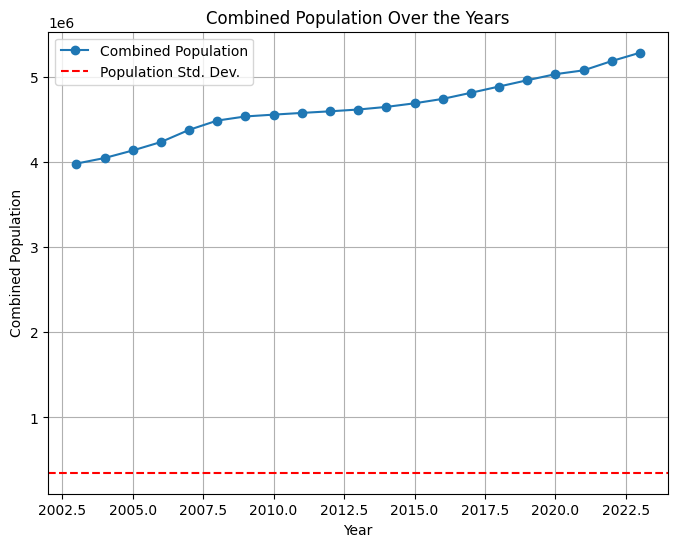

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(population__after_2003['Year'], combined_population, marker='o', label='Combined Population')
plt.xlabel('Year')
plt.ylabel('Combined Population')
plt.title('Combined Population Over the Years')
plt.grid(True)

# Add a line for the standard deviation
plt.axhline(y=population_std_dev, color='r', linestyle='--', label='Population Std. Dev.')

# Add a legend
plt.legend()

# Show the plot
plt.show()


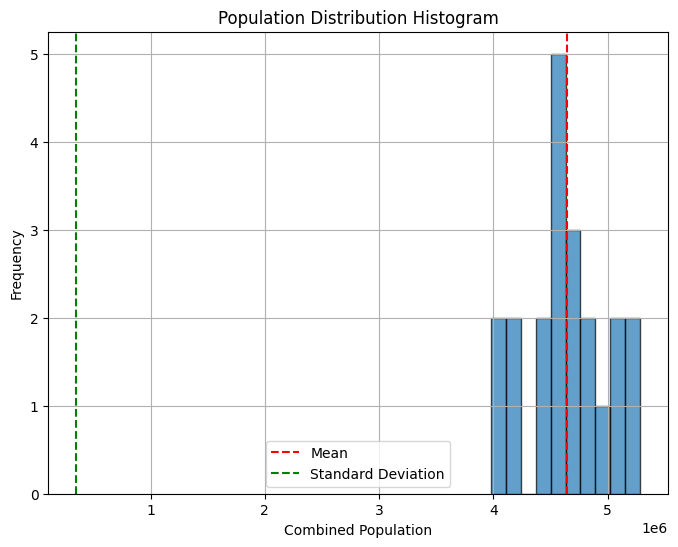

Mean: 4639111.428571428
Standard Deviation: 350663.44709864195


In [31]:
plt.figure(figsize=(8, 6))
plt.hist(combined_population, bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Combined Population')
plt.ylabel('Frequency')
plt.title('Population Distribution Histogram')
plt.grid(True)

# Add vertical lines for the mean and standard deviation
mean_value = np.mean(combined_population)
std_dev_value = np.std(combined_population)

plt.axvline(x=mean_value, color='r', linestyle='--', label='Mean')
plt.axvline(x=std_dev_value, color='g', linestyle='--', label='Standard Deviation')

# Add a legend
plt.legend()

# Show the plot
plt.show()

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev_value}")

C:\Users\kostovi\AppData\Local\Temp\ipykernel_33772\2622129401.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_population, shade=True)


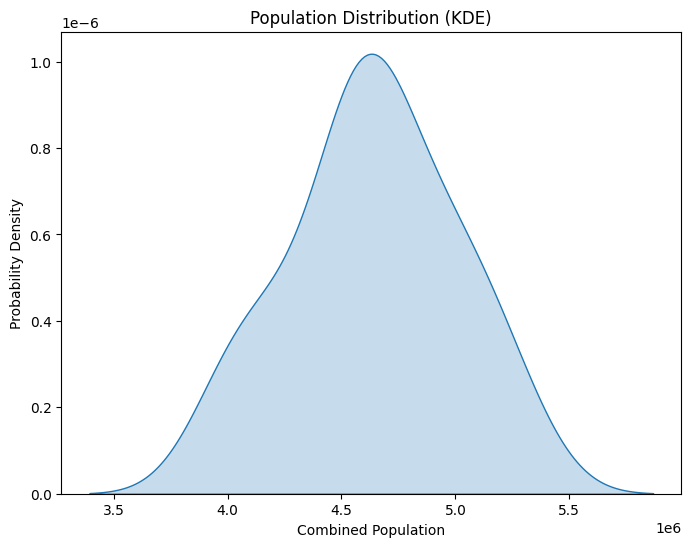

In [32]:
plt.figure(figsize=(8, 6))
sns.kdeplot(combined_population, shade=True)
plt.xlabel('Combined Population')
plt.ylabel('Probability Density')
plt.title('Population Distribution (KDE)')

# Show the plot
plt.show()

C:\Users\kostovi\AppData\Local\Temp\ipykernel_33772\3778518659.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_population, shade=True)


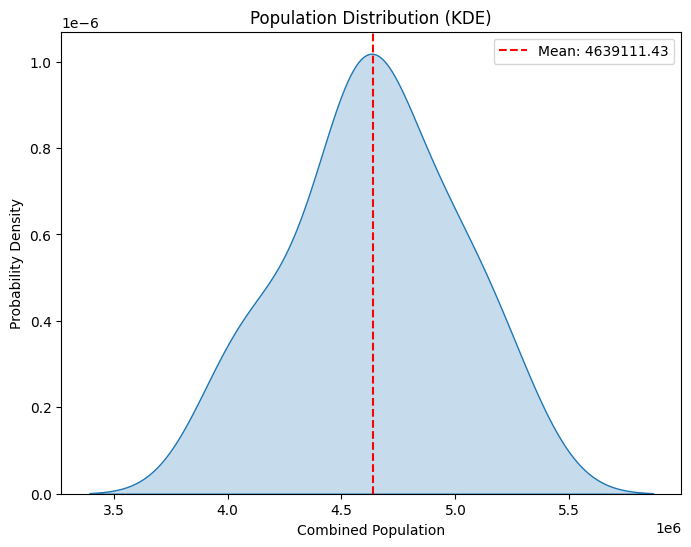

In [33]:


# Create a KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(combined_population, shade=True)
plt.xlabel('Combined Population')
plt.ylabel('Probability Density')
plt.title('Population Distribution (KDE)')

# Calculate the mean
mean_value = combined_population.mean()

# Add a vertical line for the mean
plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [34]:
population_df_filtered = population_df[(population_df['Single Year of Age'] != 'All ages') & (population_df['Sex'] != 'Both sexes') & (population_df['Year'] >= 1996)]
population_df_filtered

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands
3337,1996,200,Under 1 year,1,Male,Number,25231,25.20
3338,1996,200,Under 1 year,2,Female,Number,23623,23.60
3340,1996,001,1 year,1,Male,Number,24963,25.00
3341,1996,001,1 year,2,Female,Number,23611,23.60
3343,1996,002,2 years,1,Male,Number,25245,25.20
...,...,...,...,...,...,...,...,...
11810,2023,097,97 years,2,Female,Number,821,0.80
11812,2023,098,98 years,1,Male,Number,197,0.20
11813,2023,098,98 years,2,Female,Number,632,0.60
11815,2023,646,99 years and over,1,Male,Number,352,0.40


Creating age groups to see population distribution by age

In [35]:
age_breakdown_df = population_df[(population_df['Single Year of Age'] != 'All ages') & (population_df['Year'] >= 2016) & (population_df['Sex'] == 'Both sexes')]
age_breakdown_df

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands
9396,2016,200,Under 1 year,-,Both sexes,Number,62209,62.20
9399,2016,001,1 year,-,Both sexes,Number,63955,64.00
9402,2016,002,2 years,-,Both sexes,Number,66260,66.30
9405,2016,003,3 years,-,Both sexes,Number,68120,68.10
9408,2016,004,4 years,-,Both sexes,Number,70834,70.80
...,...,...,...,...,...,...,...,...
11802,2023,095,95 years,-,Both sexes,Number,2128,2.10
11805,2023,096,96 years,-,Both sexes,Number,1581,1.60
11808,2023,097,97 years,-,Both sexes,Number,1116,1.10
11811,2023,098,98 years,-,Both sexes,Number,829,0.80


In [36]:
age_breakdown_df['Single Year of Age'] = age_breakdown_df['Single Year of Age'].str.extract('(\d+)').astype(int)
age_breakdown_df


#converting the Single year of age to int and then I'll group the ages in age groups which is the reason why Under one year will be equal to 1 as they both are from the same age group 

C:\Users\kostovi\AppData\Local\Temp\ipykernel_33772\167077010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_breakdown_df['Single Year of Age'] = age_breakdown_df['Single Year of Age'].str.extract('(\d+)').astype(int)


,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands
9396,2016,200,1,-,Both sexes,Number,62209,62.20
9399,2016,001,1,-,Both sexes,Number,63955,64.00
9402,2016,002,2,-,Both sexes,Number,66260,66.30
9405,2016,003,3,-,Both sexes,Number,68120,68.10
9408,2016,004,4,-,Both sexes,Number,70834,70.80
...,...,...,...,...,...,...,...,...
11802,2023,095,95,-,Both sexes,Number,2128,2.10
11805,2023,096,96,-,Both sexes,Number,1581,1.60
11808,2023,097,97,-,Both sexes,Number,1116,1.10
11811,2023,098,98,-,Both sexes,Number,829,0.80


In [37]:
def age_group(age):
    if age <= 14:
        return '0-14 years old'
    elif age <= 24:
        return '15-24 years old'
    elif age <= 44:
        return '25-44 years old'
    elif age <= 64:
        return '45-64 years old'
    else:
        return '65 and over'

age_breakdown_df['Age Group'] = age_breakdown_df['Single Year of Age'].apply(age_group)

age_breakdown_df

C:\Users\kostovi\AppData\Local\Temp\ipykernel_33772\3769309966.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_breakdown_df['Age Group'] = age_breakdown_df['Single Year of Age'].apply(age_group)


,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands,Age Group
9396,2016,200,1,-,Both sexes,Number,62209,62.20,0-14 years old
9399,2016,001,1,-,Both sexes,Number,63955,64.00,0-14 years old
9402,2016,002,2,-,Both sexes,Number,66260,66.30,0-14 years old
9405,2016,003,3,-,Both sexes,Number,68120,68.10,0-14 years old
9408,2016,004,4,-,Both sexes,Number,70834,70.80,0-14 years old
...,...,...,...,...,...,...,...,...,...
11802,2023,095,95,-,Both sexes,Number,2128,2.10,65 and over
11805,2023,096,96,-,Both sexes,Number,1581,1.60,65 and over
11808,2023,097,97,-,Both sexes,Number,1116,1.10,65 and over
11811,2023,098,98,-,Both sexes,Number,829,0.80,65 and over


In [38]:
age_grouped = age_breakdown_df.groupby("Single Year of Age")["VALUE"]

# Calculate mean, median, standard deviation, and count
mean = age_grouped.mean()
median = age_grouped.median()
std = age_grouped.std()
count = age_grouped.count()


In [39]:
df = pd.DataFrame(age_breakdown_df)

# Calculate the weighted sum of ages
weighted_sum_of_ages = (df['VALUE'] * df['Single Year of Age']).sum()

# Calculate the total number of people
total_population = df['VALUE'].sum()

# Calculate the weighted average age
weighted_average_age = weighted_sum_of_ages / total_population

print("Weighted Average Age for the Years from 2016 to 2023:", weighted_average_age)

Weighted Average Age for the Years from 2016 to 2023: 37.713301402913324


In [40]:
from scipy import stats

df = pd.DataFrame(age_breakdown_df)

# Calculate the weighted mean
weighted_mean = (df['VALUE'] * df['Single Year of Age']).sum() / df['VALUE'].sum()

# Calculate the weighted median
# You can use the numpy.average function with the weights parameter
weighted_median = np.average(df['Single Year of Age'], weights=df['VALUE'])

# Calculate the weighted mode manually
# Create a dictionary to count occurrences of each value
value_counts = {}
for age, value in zip(df['Single Year of Age'], df['VALUE']):
    if age in value_counts:
        value_counts[age] += value
    else:
        value_counts[age] = value

# Find the mode with the highest count
weighted_mode = max(value_counts, key=value_counts.get)

print("Weighted Mean:", weighted_mean)
print("Weighted Mode:", weighted_mode)
print("Weighted Median:", weighted_median)

Weighted Mean: 37.713301402913324
Weighted Mode: 1
Weighted Median: 37.713301402913324


c:\Users\kostovi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


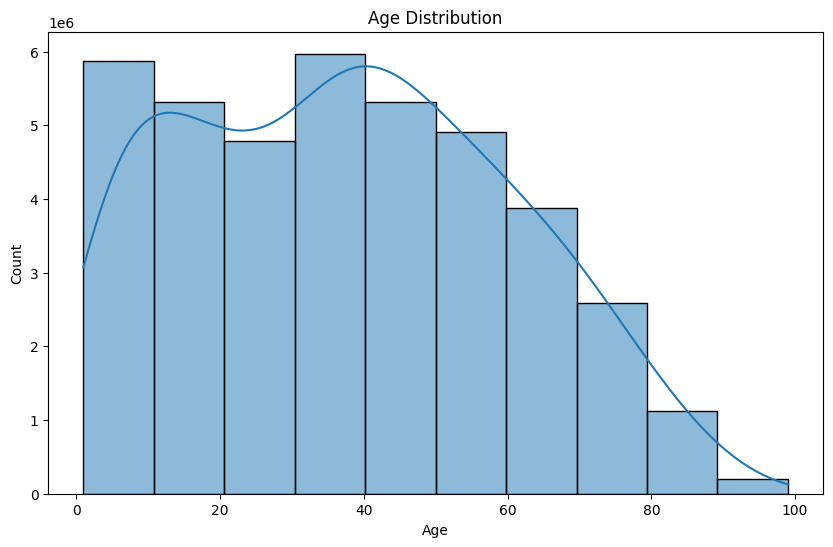

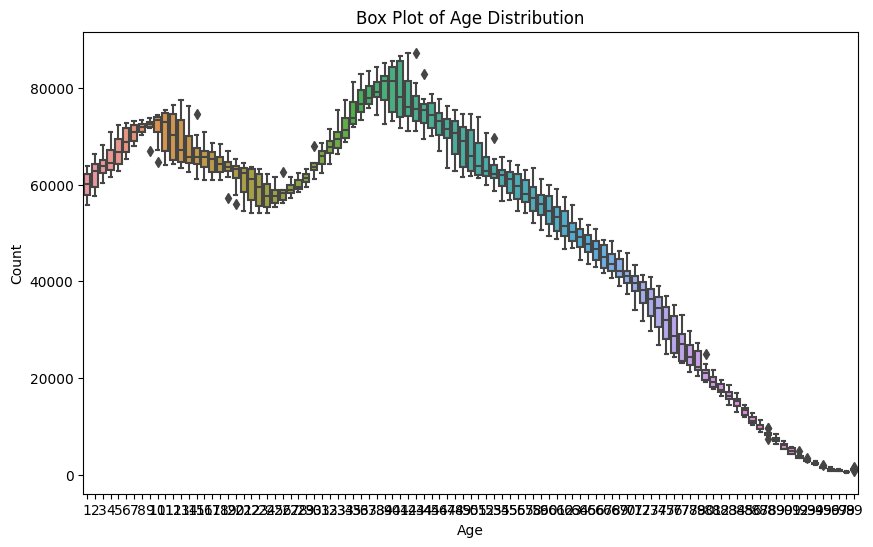

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Single Year of Age', weights='VALUE', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Single Year of Age', y='VALUE')
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [42]:
result = df.groupby('Year').apply(lambda group: (group['VALUE'] * group['Single Year of Age']).sum() / group['VALUE'].sum())

print(result)

Year
2016   36.81
2017   37.06
2018   37.26
2019   37.53
2020   37.78
2021   38.09
2022   38.39
2023   38.62
dtype: float64


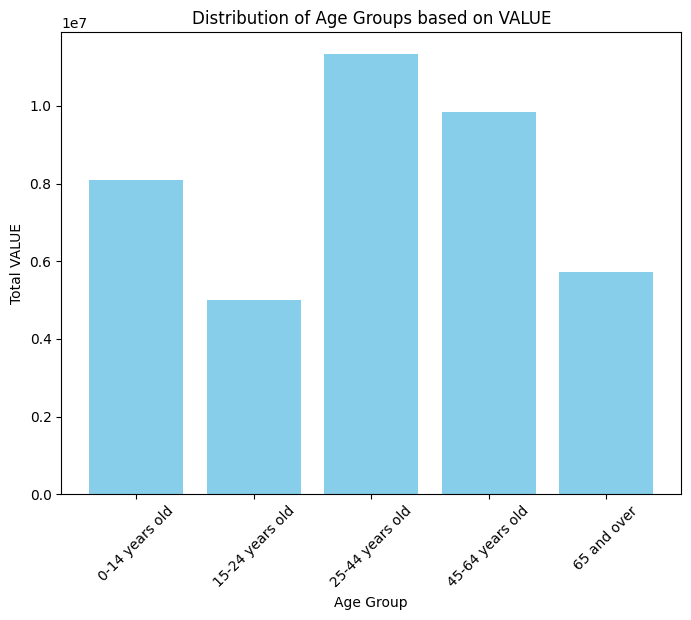

In [43]:
age_group_distribution = age_breakdown_df.groupby('Age Group')['VALUE'].sum().reset_index()

# Plot the distribution as a bar chart.
plt.figure(figsize=(8, 6))
plt.bar(age_group_distribution['Age Group'], age_group_distribution['VALUE'], color='skyblue')
plt.title('Distribution of Age Groups based on VALUE')
plt.xlabel('Age Group')
plt.ylabel('Total VALUE')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

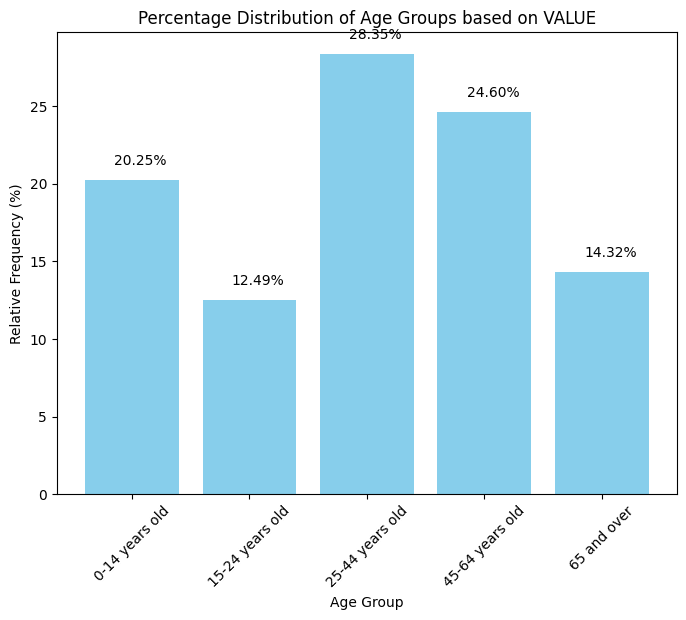

In [44]:
age_group_distribution = age_breakdown_df.groupby('Age Group')['VALUE'].sum().reset_index()

# Calculate the total sum of "VALUE" for all age groups.
total_value = age_group_distribution['VALUE'].sum()

# Calculate the relative frequency (percentage) for each age group.
age_group_distribution['Relative Frequency'] = (age_group_distribution['VALUE'] / total_value) * 100

# Plot the percentage distribution as a bar chart and annotate the percentages.
plt.figure(figsize=(8, 6))
bars = plt.bar(age_group_distribution['Age Group'], age_group_distribution['Relative Frequency'], color='skyblue')
plt.title('Percentage Distribution of Age Groups based on VALUE')
plt.xlabel('Age Group')
plt.ylabel('Relative Frequency (%)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Annotate the percentages on top of each bar.
for bar, percentage in zip(bars, age_group_distribution['Relative Frequency']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, f'{percentage:.2f}%', fontsize=10, color='black')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


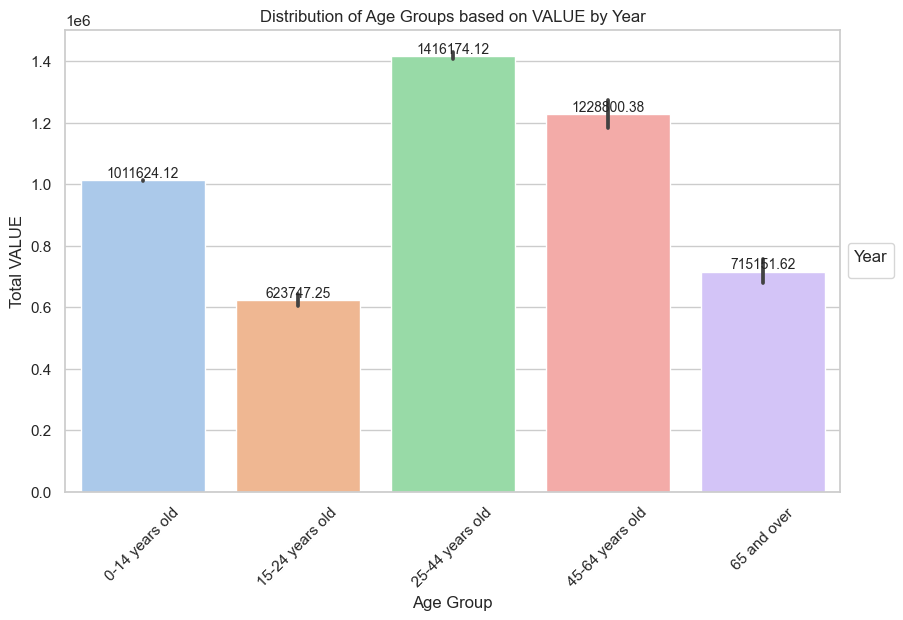

In [45]:
age_group_distribution = age_breakdown_df.groupby(['Year', 'Age Group'])['VALUE'].sum().unstack().reset_index()

# Define the list of years.
years_distrib = age_group_distribution['Year']

# Remove the 'Year' column, as it's not needed in the plot.
age_group_distribution = age_group_distribution.drop(columns='Year')

# Create the vertical grouped bar chart using seaborn.
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=age_group_distribution, orient='v', palette='pastel')

plt.title('Distribution of Age Groups based on VALUE by Year')
plt.xlabel('Age Group')
plt.ylabel('Total VALUE')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.5))

# Annotate the values on top of the bars.
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    if height > 0:
        plt.annotate(f'{height:.2f}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)

plt.show()

In [46]:
mean_value = age_breakdown_df['VALUE'].mean()
std_deviation_value = age_breakdown_df['VALUE'].std()

print(f"Mean VALUE for the entire dataset: {mean_value:.2f}")
print(f"Standard Deviation of VALUE for the entire dataset: {std_deviation_value:.2f}")

Mean VALUE for the entire dataset: 49954.97
Standard Deviation of VALUE for the entire dataset: 24565.48


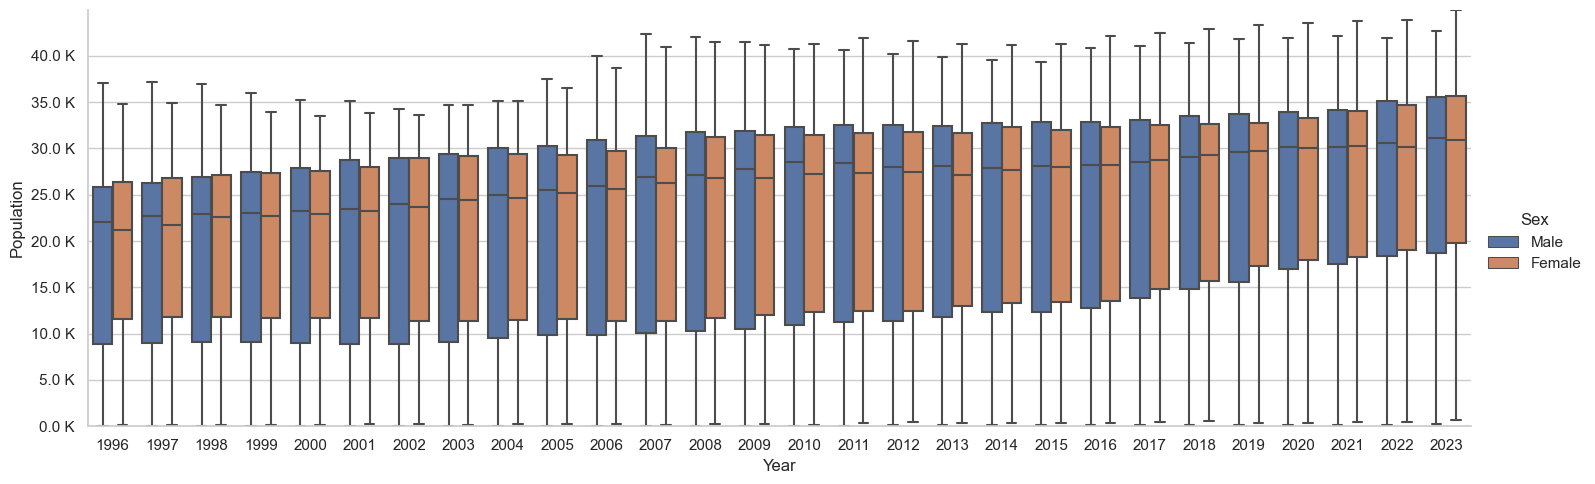

In [47]:
male_female_plot = sns.catplot(data=population_df_filtered, x='Year', y='VALUE', hue="Sex", kind="box", height= 5, aspect=3)

male_female_plot.set_axis_labels("Year", "Population")
male_female_plot.set(ylim=(0, population_df_filtered['VALUE'].max()))
male_female_plot.ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.show()

The graph below shows the population in Ireland from 1926 to 2023 with the sex breakdown. We can see that until the 80s the male population was higher than the female, however since then female population has increased. What might be the reasons for that? 

Overall, the population in Ireland is increasing. 

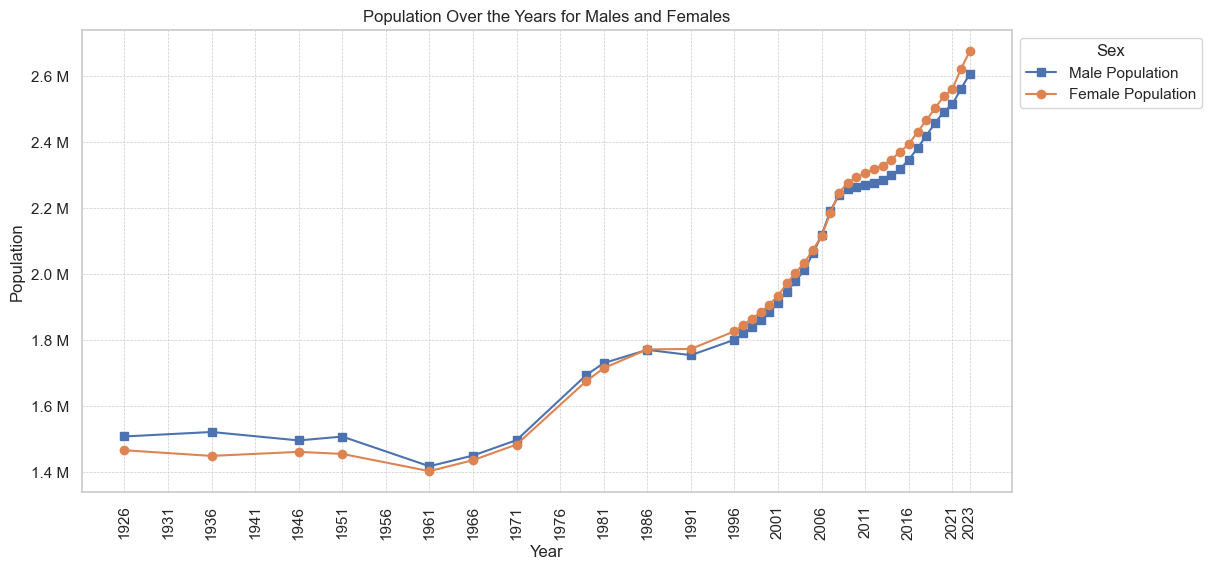

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(years, male_values, label='Male Population', marker='s')
plt.plot(years, female_values, label='Female Population', marker='o')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years for Males and Females')

plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
tick_interval = 5
xticks = [years[0], years[-1]] + list(range(years[0] + tick_interval, years[-1], tick_interval))
plt.xticks(xticks, rotation = 90)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [49]:
pivot_filtered = population_df_filtered.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')
pivot_filtered

Sex,Female,Male
Year,,
1996,1825855,1800232
1997,1844919,1819394
1998,1864223,1838859
1999,1883034,1858613
2000,1906590,1882946
2001,1934070,1913128
2002,1971039,1946164
2003,2002939,1976914
2004,2033274,2011914


In [50]:
# WE SHOULD CONVERT AGE TO INTEGER
# ValueError: could not convert string to float: 'Under 1 year'

#plt.figure(figsize=(20,10))
#c= population_df_filtered.corr()
#sns.heatmap(c,cmap="BrBG",annot=True)

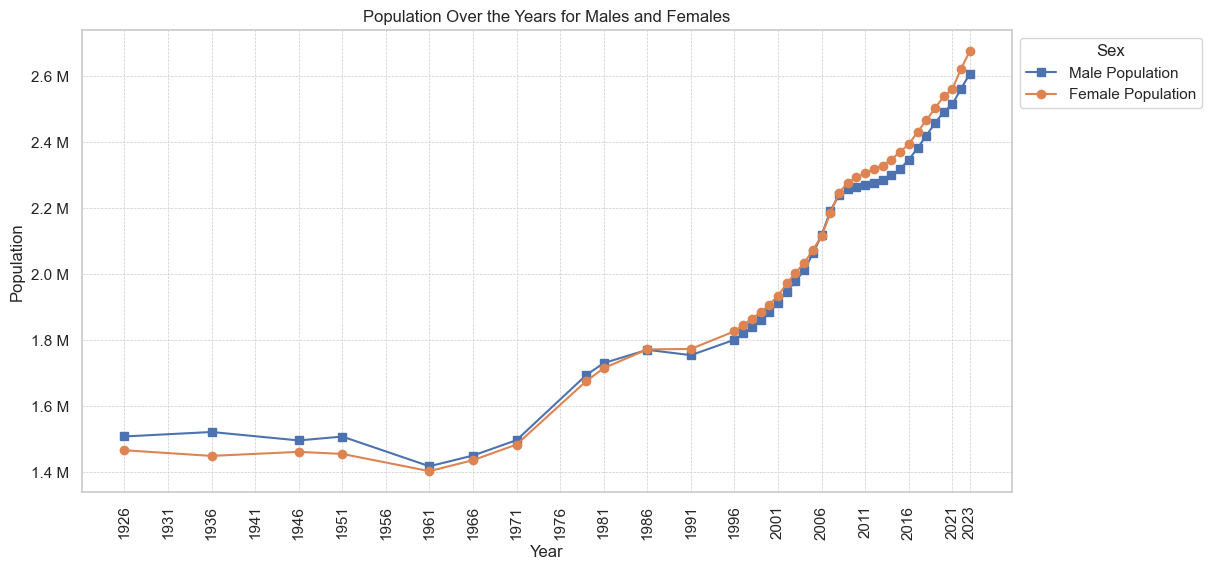

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(years, male_values, label='Male Population', marker='s')
plt.plot(years, female_values, label='Female Population', marker='o')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years for Males and Females')

plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
tick_interval = 5
xticks = [years[0], years[-1]] + list(range(years[0] + tick_interval, years[-1], tick_interval))
plt.xticks(xticks, rotation = 90)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

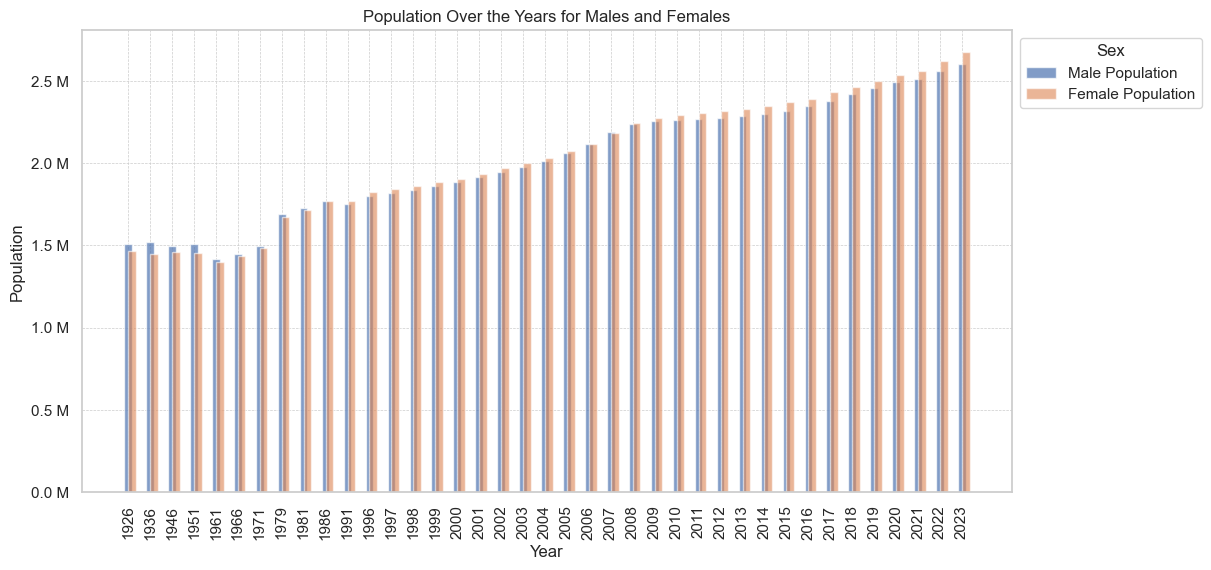

In [52]:
# BAR CHART
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(years))

plt.bar(index, male_values, bar_width, label='Male Population', align='center', alpha=0.7)
plt.bar(index, female_values, bar_width, label='Female Population', align='edge', alpha=0.6)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years for Males and Females')

plt.xticks(index, years, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title='Sex',loc='upper left', bbox_to_anchor=(1, 1))

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

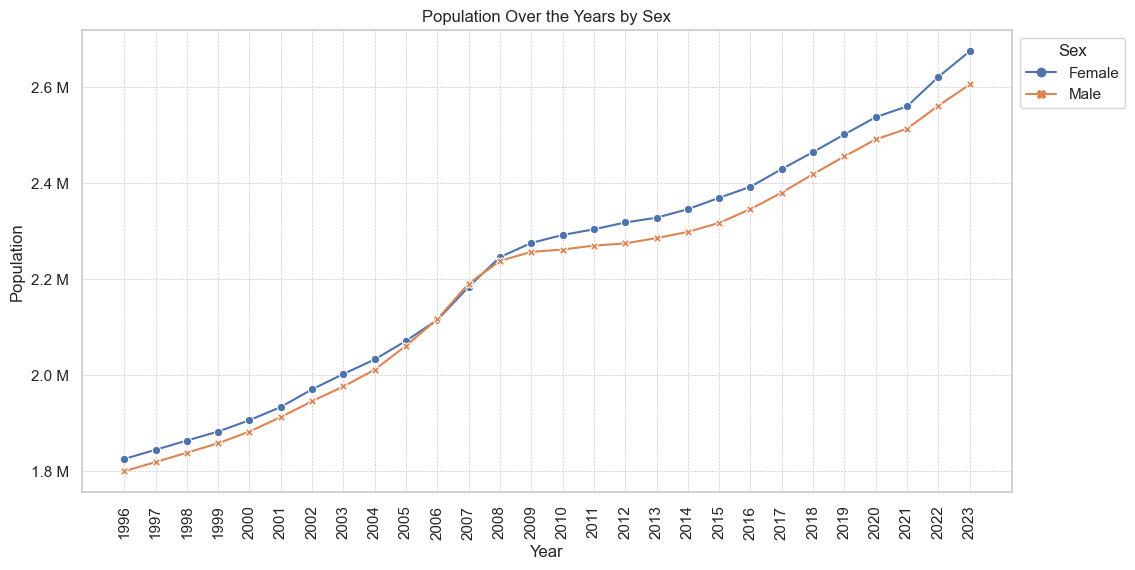

In [53]:
pivot_filtered = population_df_filtered.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.lineplot(data=pivot_filtered, markers=True, dashes=False)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years by Sex')

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', linewidth=0.5)
tick_interval = 1
xticks = [pivot_filtered.index[0], pivot_filtered.index[-1]] + list(range(pivot_filtered.index[0] + tick_interval, pivot_filtered.index[-1], tick_interval))
plt.xticks(xticks, rotation=90)

plt.show()

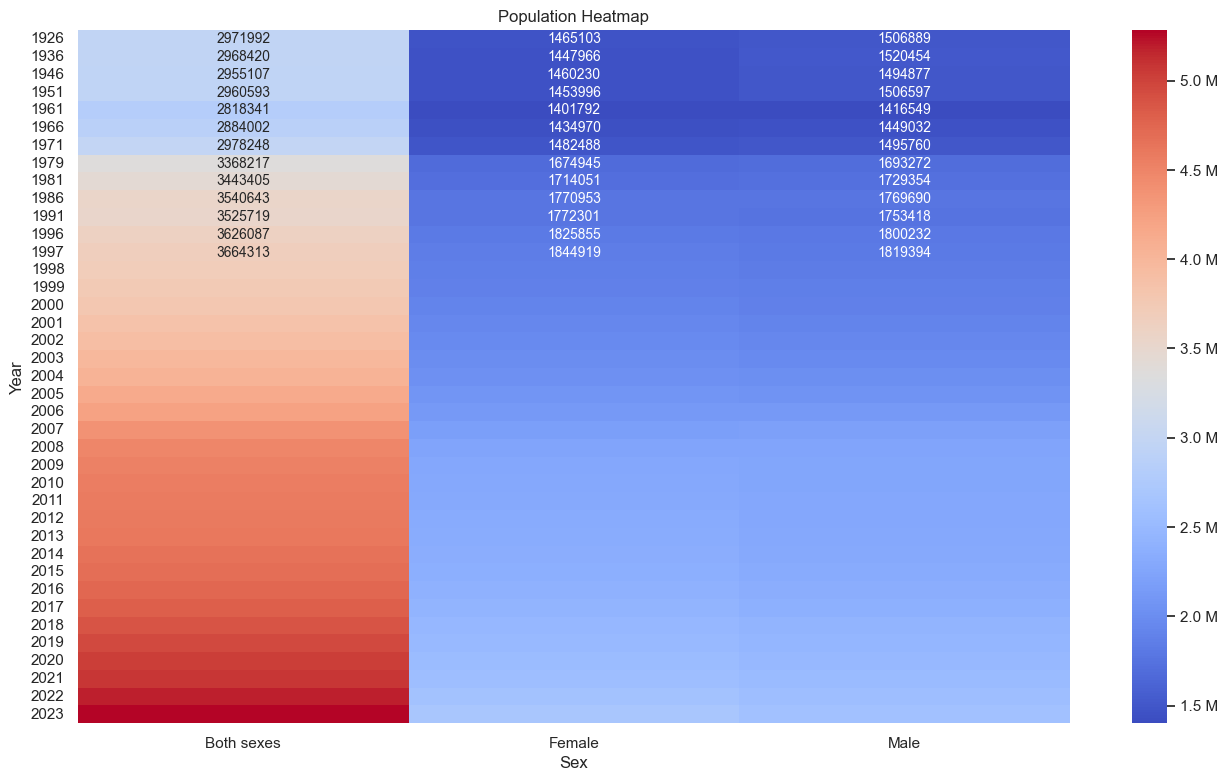

In [54]:
df = pd.DataFrame(population_df)

heatmap_data = df.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='first')

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', annot_kws={'size': 10})
plt.title('Population Heatmap')
plt.xlabel('Sex')
plt.ylabel('Year')

cbar = heatmap.collections[0].colorbar
cbar.formatter = FuncFormatter(millions_formatter)
cbar.update_ticks()

plt.show()

In [55]:
# IDEA
# Show the percentage increase or decrease in population for each period - between each year in the dataset or per 5-10 years.

#### **Population Projection**

In [56]:
# Maybe I need to filter just the Year and VALUE columns?
filtered_BothSex = population_df[(population_df['Single Year of Age'] == 'All ages') & (population_df['Sex'] == 'Both sexes') & (population_df['Year'] >= 2003)]

# removing of all the clolumns which all the values are hyphens. We don't need them.
def is_all_hyphens(column):
    return not all(column == '-')
filtered_BothSex = filtered_BothSex.loc[:, filtered_BothSex.apply(is_all_hyphens)]

filtered_BothSex

,Year,Single Year of Age,Sex,UNIT,VALUE,Value_in_thousands
5454,2003,All ages,Both sexes,Number,3979853,3979.90
5757,2004,All ages,Both sexes,Number,4045188,4045.20
6060,2005,All ages,Both sexes,Number,4133839,4133.80
6363,2006,All ages,Both sexes,Number,4232929,4232.90
6666,2007,All ages,Both sexes,Number,4375842,4375.80
6969,2008,All ages,Both sexes,Number,4485070,4485.10
7272,2009,All ages,Both sexes,Number,4533395,4533.40
7575,2010,All ages,Both sexes,Number,4554763,4554.80
7878,2011,All ages,Both sexes,Number,4574888,4574.90
8181,2012,All ages,Both sexes,Number,4593697,4593.70


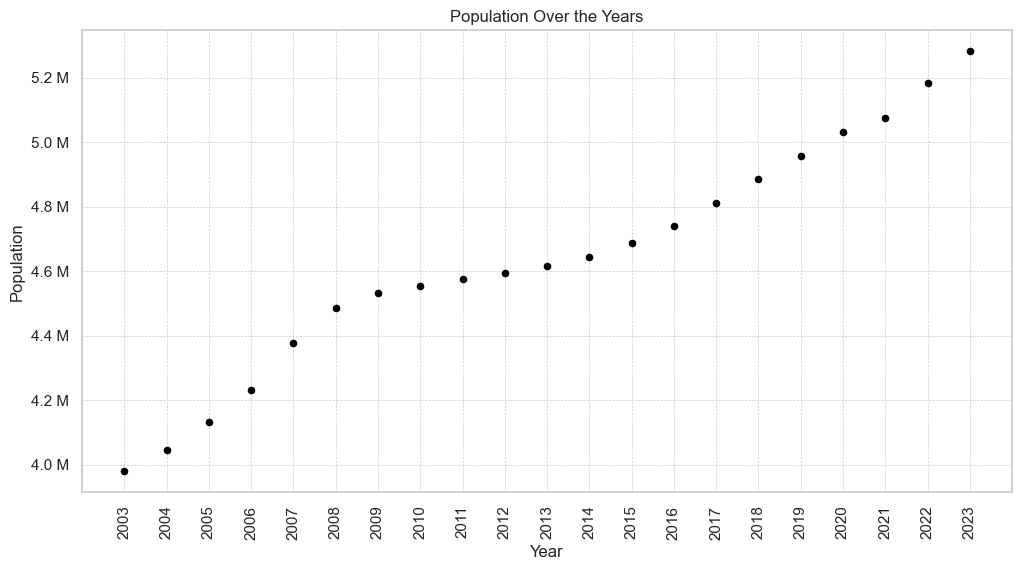

In [57]:
filtered_BothSex.plot(kind='scatter', x='Year', y='VALUE', figsize=(12, 6) ,color='black')

plt.title('Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
years = filtered_BothSex['Year'].values
plt.xticks(years, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()


In [58]:
X = filtered_BothSex[['Year']]
y = filtered_BothSex['VALUE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

#future_years = [2050, 2060, 2070]  # years we want to predict
future_years = [2050] 
future_data = pd.DataFrame({'Year': future_years})
predicted_population = model.predict(future_data)
print(f'Predicted population to {future_years[0]} is {predicted_population[0]:.0f}')

R-squared: 0.964272256633945
Predicted population to 2050 is 6678149


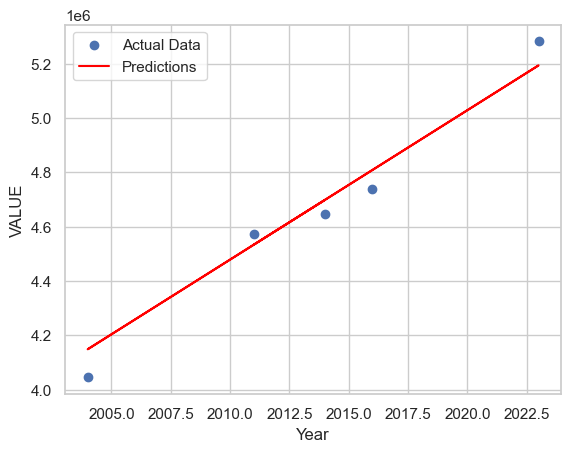

In [59]:
# NOTE do we need to visualive all the points in the scatter
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.legend()
plt.show()


https://www.cso.ie/en/releasesandpublications/ep/p-plfp/populationandlabourforceprojections2017-2051/populationprojectionsresults/?fbclid=IwAR0y2ch0t6PVr-Rbk_qAo7pzcDPPPqGXHRWB4wnp5B9MK39WAtVmeEPauWo 

When compared to the Central Statistic Office we see that our estimated value of 6.7M is the same as the one we see on the Statistics Office. 

-----------------------------

#### **The immigration dataset**

The same EDA analysis will be performed for the second dataset which will be in regards ot the immgiration. 

In [60]:
migration_df = pd.read_csv('PEA18.20231016T141007.csv')

In [61]:
migration_df.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.70
1,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.80
2,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.10
3,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.00
4,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.10


In [62]:
#access the size of the dataset
print("There are", migration_df.size, "values in total across the whole dataset")

There are 31968 values in total across the whole dataset


In [63]:
migration_df.shape

(2664, 12)

In [64]:
migration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATISTIC              2664 non-null   object 
 1   STATISTIC Label        2664 non-null   object 
 2   TLIST(A1)              2664 non-null   int64  
 3   Year                   2664 non-null   int64  
 4   C02719V03286           2664 non-null   object 
 5   Country                2664 non-null   object 
 6   C02199V02655           2664 non-null   object 
 7   Sex                    2664 non-null   object 
 8   C02542V03077           2664 non-null   int64  
 9   Origin or Destination  2664 non-null   object 
 10  UNIT                   2664 non-null   object 
 11  VALUE                  2104 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 249.9+ KB


In [65]:
migration_df = migration_df.drop(['STATISTIC', 'STATISTIC Label', 'TLIST(A1)'], axis=1)
migration_df.head()

,Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.70
1,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.80
2,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.10
3,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.00
4,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.10


In [66]:
migration_df = migration_df.rename(columns={'C02719V03286':'Country category', 'C02199V02655':'Sex category', 'C02542V03077':'Migration label' })
migration_df.head()

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
0,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.70
1,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.80
2,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.10
3,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.00
4,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.10


#### **Descriptive statistics**

In [67]:
migration_df.describe()

,Year,Migration label,VALUE
count,2664.00,2664.00,2104.00
mean,2005.00,3.33,8.94
std,10.68,1.70,15.51
min,1987.00,1.00,-43.90
25%,1996.00,1.00,1.80
50%,2005.00,4.00,4.70
75%,2014.00,5.00,10.20
max,2023.00,5.00,151.10


<div style="text-align: center;">
  <div style="display: inline-block;">
    <img src="imgs/3459021-200.png" alt="data quality" width="60">
  </div>
  <h3 style="display: inline;">Verifying data quality</h3>
</div>

In [68]:
missing_data = migration_df.isna()
missing_data

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2659,False,False,False,False,False,False,False,False,False
2660,False,False,False,False,False,False,False,False,False
2661,False,False,False,False,False,False,False,False,False
2662,False,False,False,False,False,False,False,False,False


In comparison to the first dataset, here we do have missing values in the VALUE column. We should explore those and understand what is the best way to deal with them. 

In [69]:
missing_data_count = migration_df.isna().sum()
missing_data_count

Year                       0
Country category           0
Country                    0
Sex category               0
Sex                        0
Migration label            0
Origin or Destination      0
UNIT                       0
VALUE                    560
dtype: int64

In [70]:
rows_with_nan = migration_df[migration_df['VALUE'].isna()]
rows_with_nan

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
18,1987,CA,Canada,-,Both sexes,1,Net migration,Thousand,NaN
19,1987,CA,Canada,-,Both sexes,4,Emigrants: All destinations,Thousand,NaN
20,1987,CA,Canada,-,Both sexes,5,Immigrants: All origins,Thousand,NaN
21,1987,CA,Canada,1,Male,1,Net migration,Thousand,NaN
22,1987,CA,Canada,1,Male,4,Emigrants: All destinations,Thousand,NaN
...,...,...,...,...,...,...,...,...,...
1471,2007,AU,Australia,1,Male,4,Emigrants: All destinations,Thousand,NaN
1472,2007,AU,Australia,1,Male,5,Immigrants: All origins,Thousand,NaN
1473,2007,AU,Australia,2,Female,1,Net migration,Thousand,NaN
1474,2007,AU,Australia,2,Female,4,Emigrants: All destinations,Thousand,NaN


Checking for duplicates

In [71]:
duplicates = migration_df[migration_df.duplicated()]
print("number of duplicate rows:", duplicates.shape)

number of duplicate rows: (0, 9)


We do not have any duplicated data.

Let's visualize the data, so that we can get a better understanding of the missing values and chose the best way of handling the missing data - either dropping the rows, or assigning values to the NaN 

#### **Emigration data**

In [72]:
emigration_df = migration_df[(migration_df['Origin or Destination'] == 'Emigrants: All destinations') & (migration_df['Sex'] == 'Both sexes') & (migration_df['Year'] >= 2015) & (migration_df['Country'] != 'All countries')]
emigration_df

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
2017,2015,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,16.60
2026,2015,US,United States,-,Both sexes,4,Emigrants: All destinations,Thousand,5.10
2035,2015,CA,Canada,-,Both sexes,4,Emigrants: All destinations,Thousand,6.60
2044,2015,AU,Australia,-,Both sexes,4,Emigrants: All destinations,Thousand,6.50
2053,2015,ZZWORX23,Other countries (23),-,Both sexes,4,Emigrants: All destinations,Thousand,15.90
...,...,...,...,...,...,...,...,...,...
2611,2023,CA,Canada,-,Both sexes,4,Emigrants: All destinations,Thousand,5.30
2620,2023,AU,Australia,-,Both sexes,4,Emigrants: All destinations,Thousand,4.70
2629,2023,ZZWORX23,Other countries (23),-,Both sexes,4,Emigrants: All destinations,Thousand,11.70
2647,2023,E1420XIE,EU14 excl Irl (UK & Ireland),-,Both sexes,4,Emigrants: All destinations,Thousand,13.90


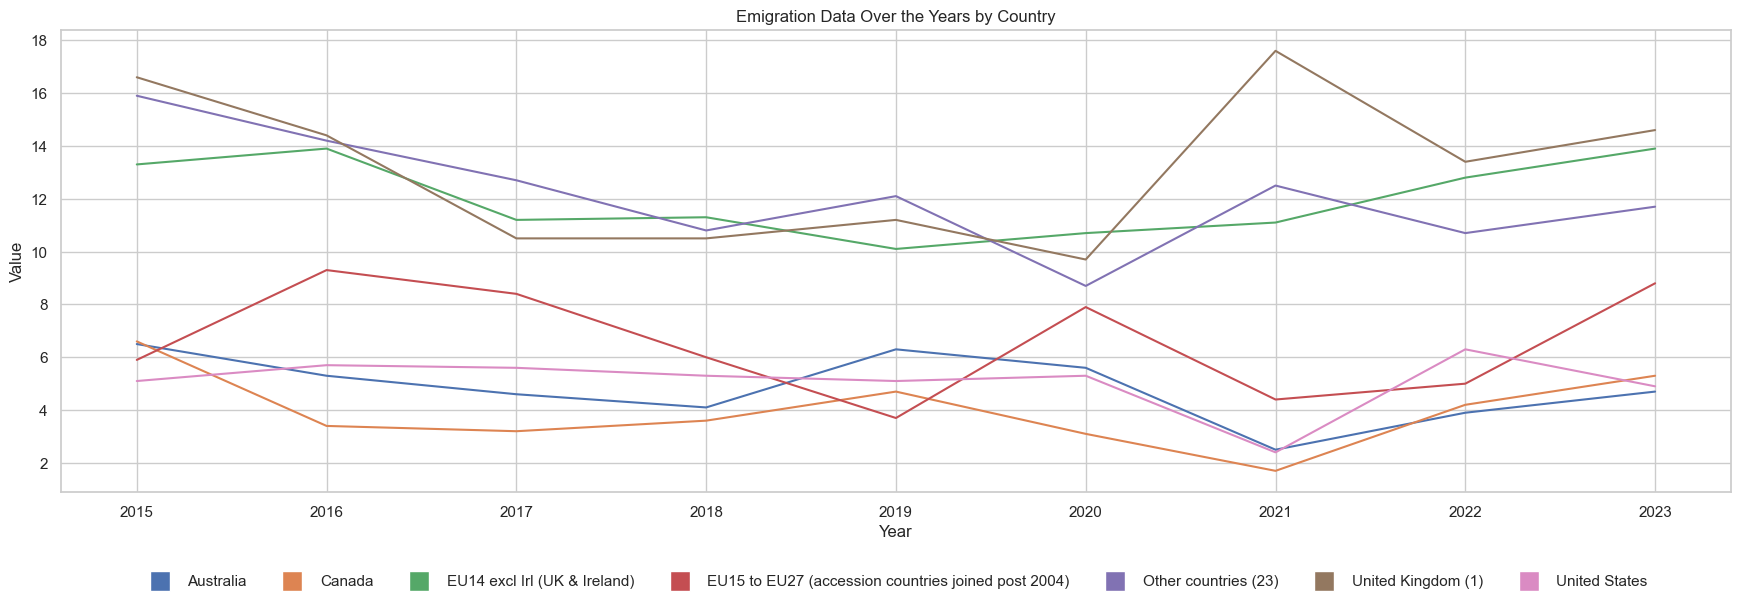

In [73]:
plt.figure(figsize=(21.55, 6))
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
legend_elements = []

pivot_table_emigration = emigration_df.pivot_table(index='Year', columns='Country', values='VALUE', aggfunc= 'sum')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Emigration Data Over the Years by Country')

for i, country in enumerate(pivot_table_emigration.columns):
    color = colors[i]
    plt.plot(pivot_table_emigration.index, pivot_table_emigration[country], color, label=country)
    #legend_elements.append(Line2D([0], [0], color=color, label=country))
    legend_elements.append(plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color,label=country, markersize=15))

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, frameon=False)
plt.show()

In [74]:
emigration_df_all_countries_total = migration_df[(migration_df['Origin or Destination'] == 'Emigrants: All destinations') & (migration_df['Sex'] == 'Both sexes') & (migration_df['Year'] >= 2015) & (migration_df['Country'] == 'All countries')]
emigration_df_all_countries_total

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
2062,2015,-,All countries,-,Both sexes,4,Emigrants: All destinations,Thousand,70.00
2134,2016,-,All countries,-,Both sexes,4,Emigrants: All destinations,Thousand,66.20
2206,2017,-,All countries,-,Both sexes,4,Emigrants: All destinations,Thousand,56.10
2278,2018,-,All countries,-,Both sexes,4,Emigrants: All destinations,Thousand,51.60
2350,2019,-,All countries,-,Both sexes,4,Emigrants: All destinations,Thousand,53.10
2422,2020,-,All countries,-,Both sexes,4,Emigrants: All destinations,Thousand,50.90
2494,2021,-,All countries,-,Both sexes,4,Emigrants: All destinations,Thousand,52.30
2566,2022,-,All countries,-,Both sexes,4,Emigrants: All destinations,Thousand,56.10
2638,2023,-,All countries,-,Both sexes,4,Emigrants: All destinations,Thousand,64.00


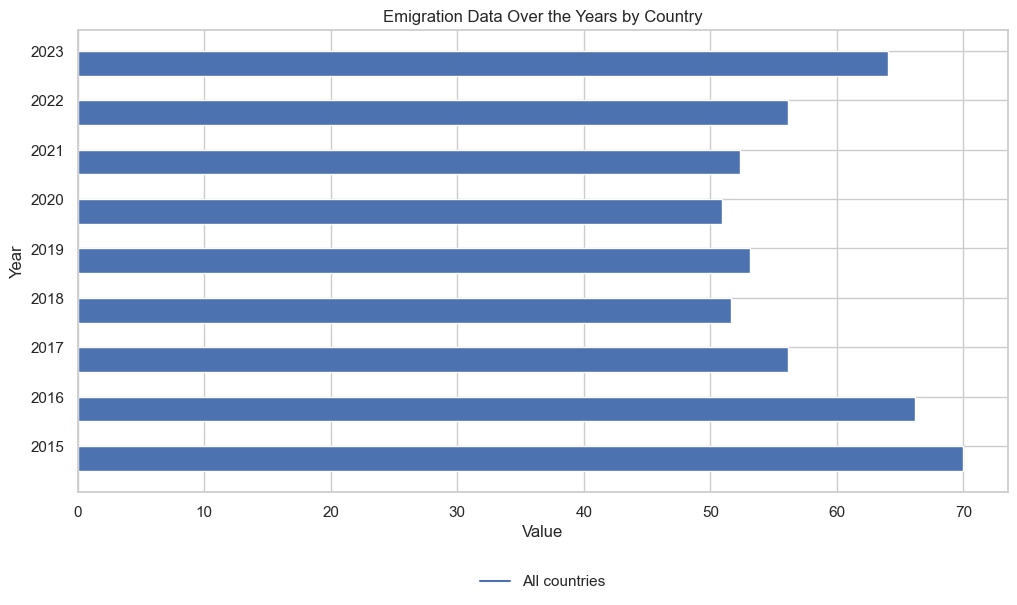

In [75]:
plt.figure(figsize=(12, 6))
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
legend_elements = []

pivot_table_emigration = emigration_df_all_countries_total.pivot_table(index='Year', columns='Country', values='VALUE', aggfunc='sum')
plt.ylabel('Year')
plt.xlabel('Value')
plt.title('Emigration Data Over the Years by Country')

bar_height = 0.50

for i, country in enumerate(pivot_table_emigration.columns):
    color = colors[i]
    y = pivot_table_emigration.index + i * bar_height 
    plt.barh(y, pivot_table_emigration[country], bar_height, color=color, label=country)
    legend_elements.append(plt.Line2D([0], [0], color=color, label=country))


plt.yticks(pivot_table_emigration.index + bar_height * (len(pivot_table_emigration.columns) / 2), pivot_table_emigration.index)

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, frameon=False)
plt.show()

#### **Immigration data**

In [76]:
immigration_df = migration_df[(migration_df['Origin or Destination'] == 'Immigrants: All origins') & (migration_df['Sex'] == 'Both sexes') & (migration_df['Year'] >= 2015) & (migration_df['Country'] != 'All countries')]
immigration_df

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
2018,2015,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,16.40
2027,2015,US,United States,-,Both sexes,5,Immigrants: All origins,Thousand,4.40
2036,2015,CA,Canada,-,Both sexes,5,Immigrants: All origins,Thousand,2.70
2045,2015,AU,Australia,-,Both sexes,5,Immigrants: All origins,Thousand,5.80
2054,2015,ZZWORX23,Other countries (23),-,Both sexes,5,Immigrants: All origins,Thousand,22.80
...,...,...,...,...,...,...,...,...,...
2612,2023,CA,Canada,-,Both sexes,5,Immigrants: All origins,Thousand,7.20
2621,2023,AU,Australia,-,Both sexes,5,Immigrants: All origins,Thousand,7.70
2630,2023,ZZWORX23,Other countries (23),-,Both sexes,5,Immigrants: All origins,Thousand,75.80
2648,2023,E1420XIE,EU14 excl Irl (UK & Ireland),-,Both sexes,5,Immigrants: All origins,Thousand,17.70


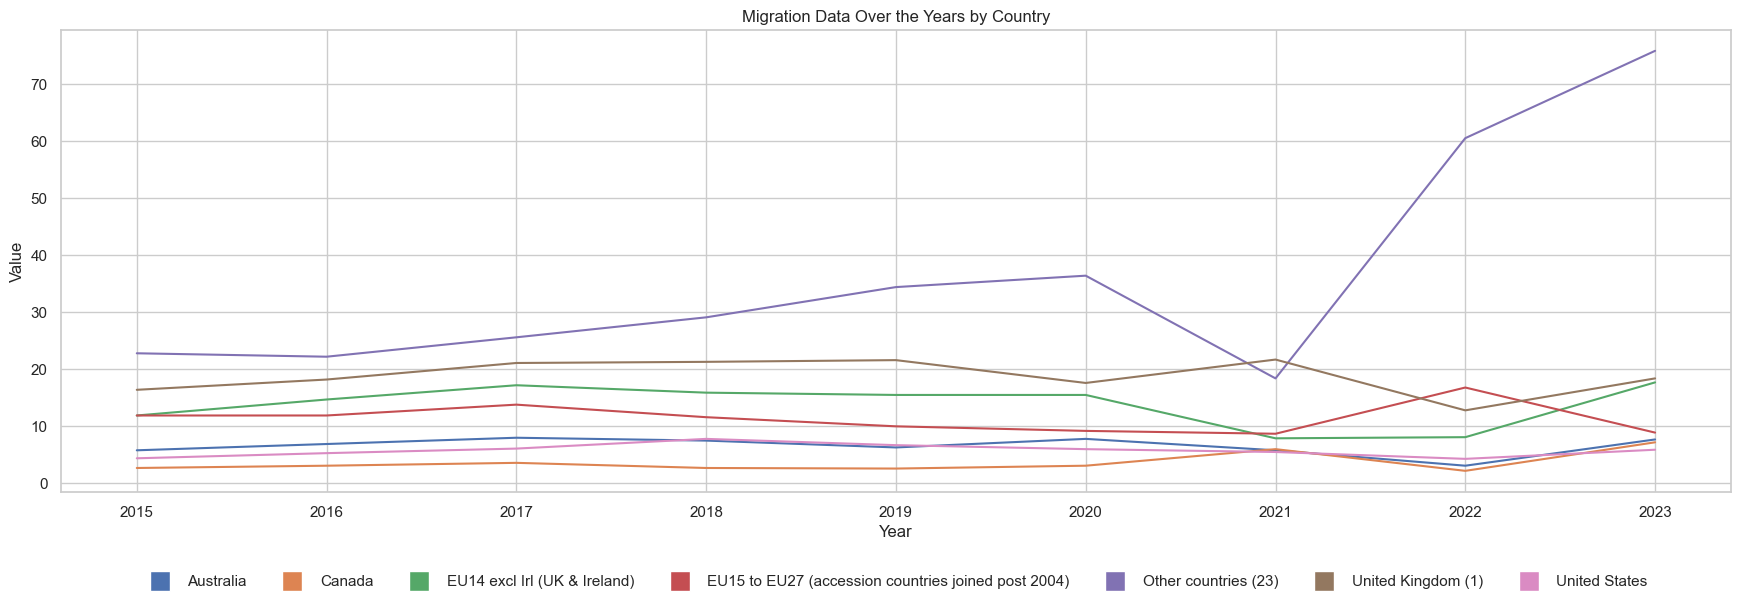

In [77]:
plt.figure(figsize=(21.55, 6))
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
legend_elements = []

pivot_table_immigration = immigration_df.pivot_table(index='Year', columns='Country', values='VALUE', aggfunc= 'sum')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Migration Data Over the Years by Country')

for i, country in enumerate(pivot_table_immigration.columns):
    color = colors[i]
    plt.plot(pivot_table_immigration.index, pivot_table_immigration[country], color, label=country)
    #legend_elements.append(Line2D([0], [0], color=color, label=country))
    legend_elements.append(plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color,label=country, markersize=15))

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, frameon=False)
plt.show()

In [78]:
immigration_df_all_countries_total = migration_df[(migration_df['Origin or Destination'] == 'Immigrants: All origins') & (migration_df['Sex'] == 'Both sexes') & (migration_df['Year'] >= 2015) & (migration_df['Country'] == 'All countries')]
immigration_df_all_countries_total

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
2063,2015,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,75.90
2135,2016,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,82.30
2207,2017,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,95.30
2279,2018,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,96.00
2351,2019,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,97.10
2423,2020,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,95.60
2495,2021,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,74.10
2567,2022,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,107.80
2639,2023,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,141.60


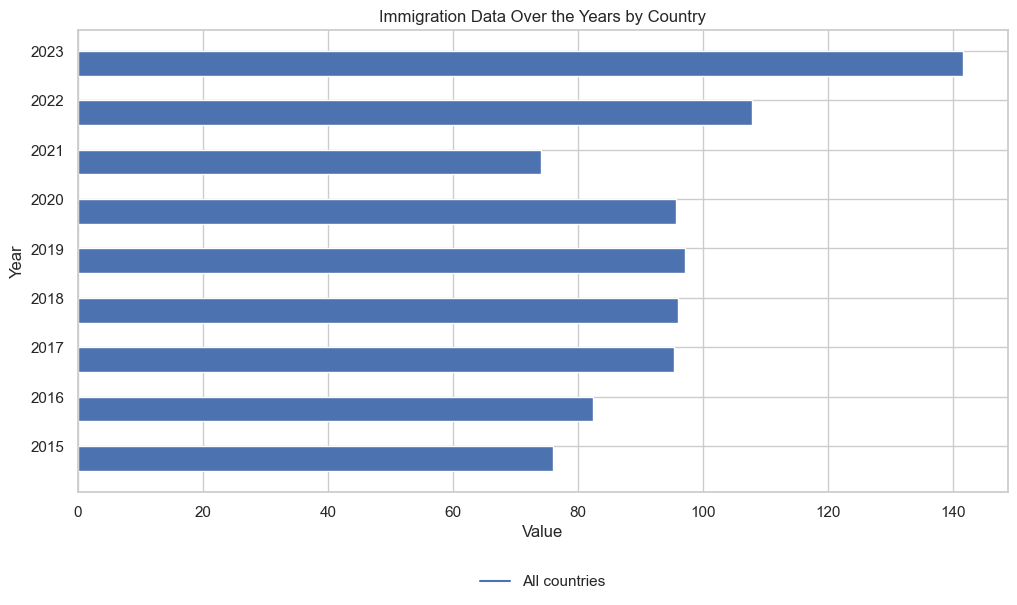

In [79]:
plt.figure(figsize=(12, 6))
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
legend_elements = []

pivot_table_immigration = immigration_df_all_countries_total.pivot_table(index='Year', columns='Country', values='VALUE', aggfunc='sum')
plt.ylabel('Year')
plt.xlabel('Value')
plt.title('Immigration Data Over the Years by Country')


bar_height = 0.50

for i, country in enumerate(pivot_table_immigration.columns):
    color = colors[i]
    y = pivot_table_immigration.index + i * bar_height 
    plt.barh(y, pivot_table_immigration[country], bar_height, color=color, label=country)
    legend_elements.append(plt.Line2D([0], [0], color=color, label=country))


plt.yticks(pivot_table_immigration.index + bar_height * (len(pivot_table_immigration.columns) / 2), pivot_table_immigration.index)

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, frameon=False)
plt.show()

In [80]:
emigrants = migration_df[(migration_df['Origin or Destination'] == 'Emigrants: All destinations') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN') & (migration_df['Country'] == 'All countries')]
immigrants = migration_df[(migration_df['Origin or Destination'] == 'Immigrants: All origins') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN') & (migration_df['Country'] == 'All countries')]
net_migration = migration_df[(migration_df['Origin or Destination'] == 'Net migration') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN') & (migration_df['Country'] == 'All countries')]
years = migration_df['Year'].unique()
emigrants_values = emigrants['VALUE'].values
immigrants_values = immigrants['VALUE'].values
net_migration_values = net_migration['VALUE'].values

emigration_and_migration = pd.DataFrame({'Years': years, 'Emigrants': emigrants_values, 'Immigrants': immigrants_values, 'Net migration': net_migration_values})


emigration_and_migration

,Years,Emigrants,Immigrants,Net migration
0,1987,40.20,17.20,-23.00
1,1988,61.10,19.20,-41.90
2,1989,70.60,26.70,-43.90
3,1990,56.30,33.30,-22.90
4,1991,35.30,33.30,-2.00
5,1992,33.40,40.70,7.40
6,1993,35.10,34.70,-0.40
7,1994,34.80,30.10,-4.70
8,1995,33.10,31.20,-1.90
9,1996,31.20,39.20,8.00


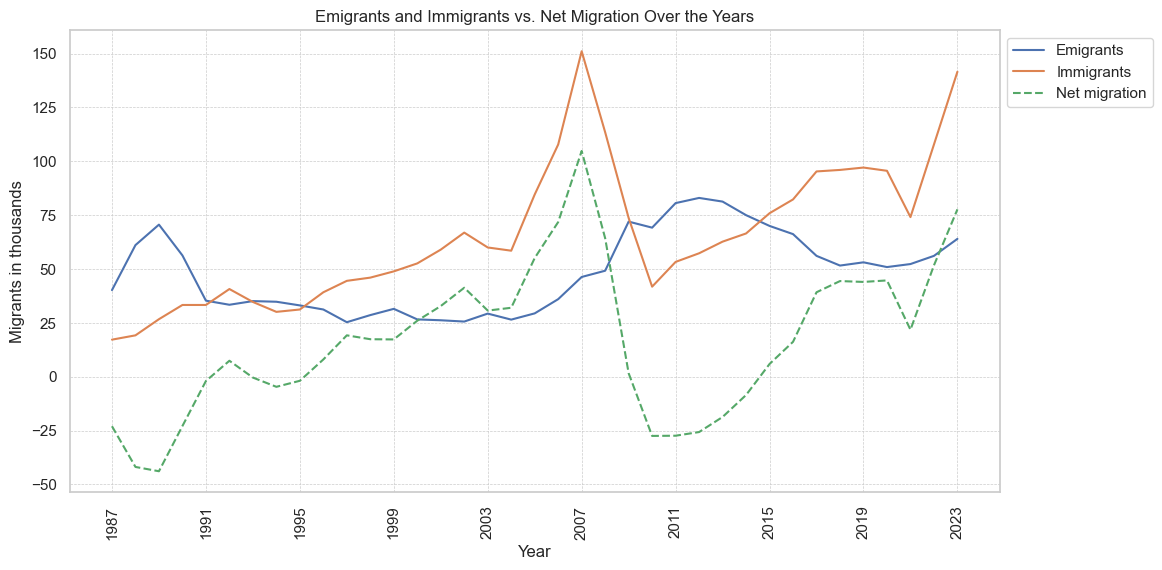

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(years, emigrants_values, label='Emigrants', marker='')
plt.plot(years, immigrants_values, label='Immigrants', marker='')
plt.plot(years, net_migration_values, label='Net migration', linestyle = '--', marker='')
plt.xlabel('Year')
plt.ylabel('Migrants in thousands')
plt.title('Emigrants and Immigrants vs. Net Migration Over the Years')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
tick_interval = 4
xticks = [years[0], years[-1]] + list(range(years[0] + tick_interval, years[-1], tick_interval))
plt.xticks(xticks, rotation = 90)
plt.legend(title='Migration')
#plt.ticklabel_format(useOffset=False, style='plain')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


From the grpaph above we can see that the highest number of migrants was in 2007, and we can see a trend of increasing the immigration in the last 2 years. 

We can see a 15-year high when it comes to the immigrants. There is also an increase in the last couple of years for the emigrants.

The decrease we see around 2019-2021 - COVID

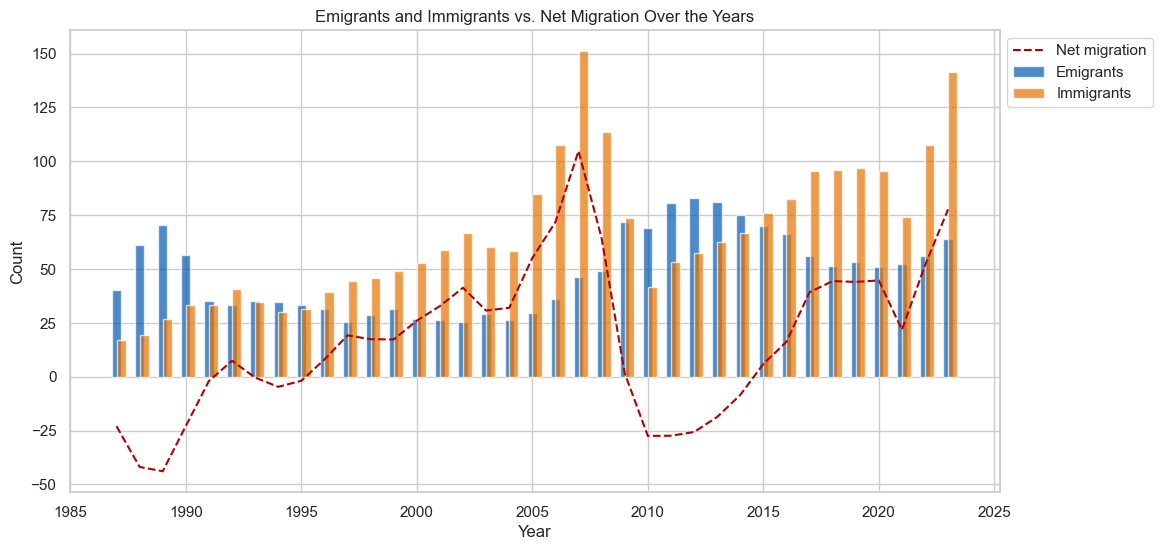

In [82]:
plt.figure(figsize=(12,6))

plt.bar(years, emigrants_values, label='Emigrants', color='#0059b3', alpha=0.7, width=0.4)
plt.bar(years, immigrants_values, label='Immigrants', color='#e67300', alpha=0.7, width=0.4, align='edge')

# Add a line plot for 'Net migration'
plt.plot(years, net_migration_values, label='Net migration', marker='', linestyle='--', color='#b30000')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.title('Emigrants and Immigrants vs. Net Migration Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [83]:
immigration_df_all_countries_total

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
2063,2015,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,75.90
2135,2016,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,82.30
2207,2017,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,95.30
2279,2018,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,96.00
2351,2019,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,97.10
2423,2020,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,95.60
2495,2021,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,74.10
2567,2022,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,107.80
2639,2023,-,All countries,-,Both sexes,5,Immigrants: All origins,Thousand,141.60


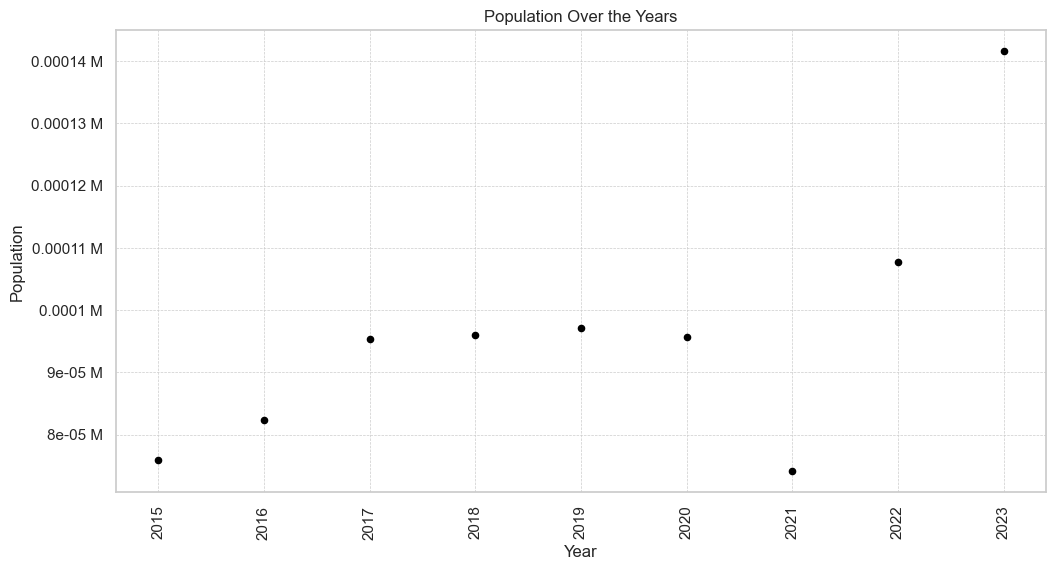

In [84]:
immigration_df_all_countries_total.plot(kind='scatter', x='Year', y='VALUE', figsize=(12, 6) ,color='black')

plt.title('Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
years = immigration_df_all_countries_total['Year'].values
plt.xticks(years, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

In [85]:
X = immigration_df_all_countries_total[['Year']]
y = immigration_df_all_countries_total['VALUE']


model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)

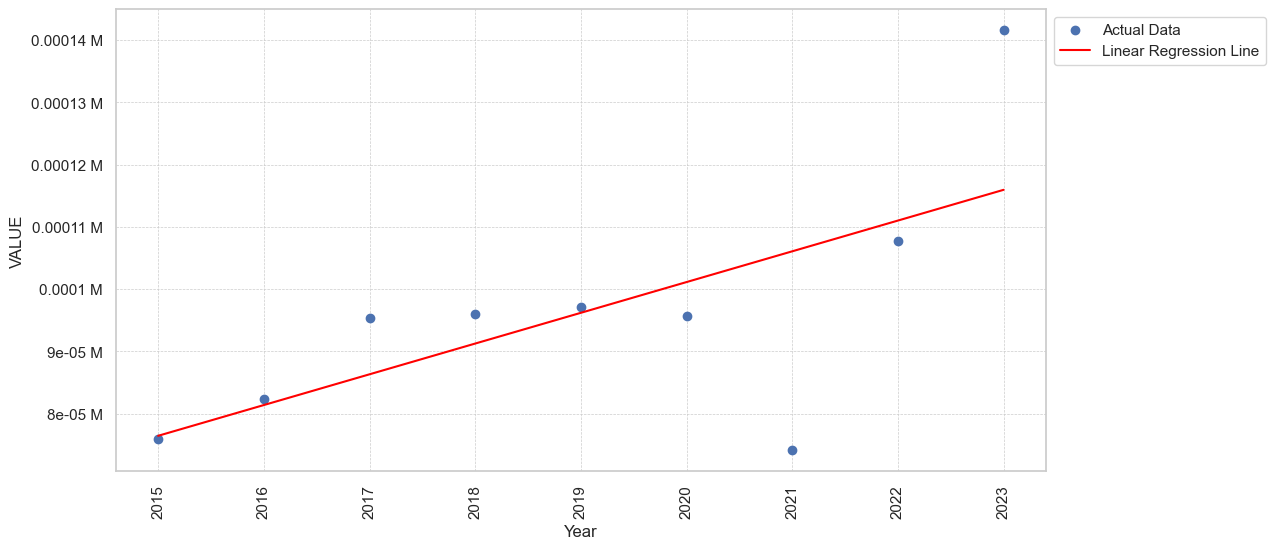

In [86]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X, predictions, color='red', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('VALUE')
years = immigration_df_all_countries_total['Year'].values
plt.xticks(years, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1))


In [87]:
new_data_immigration = pd.DataFrame({'Year': [2050]})
predicted_value_2050_immigration = model.predict(new_data_immigration)

In [88]:
new_data_immigration= pd.DataFrame({'Year': [2050]})

# Make predictions for the year 2050
predicted_value_2050_immigration = model.predict(new_data_immigration)

print(f"Predicted value for the population for Year 2050: {predicted_value_2050_immigration[0]:.0f}")

Predicted value for the population for Year 2050: 249


In [89]:
emigrants = migration_df[(migration_df['Origin or Destination'] == 'Emigrants: All destinations') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN')]
immigrants = migration_df[(migration_df['Origin or Destination'] == 'Immigrants: All origins') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN')]
countries = migration_df['Country'].unique()
# emigrants_values = emigrants['VALUE'].values
# immigrants_values = immigrants['VALUE'].values

# emigration_and_migration = pd.DataFrame({'Country': countries, 'Emigrants': emigrants_values, 'Immigrants': immigrants_values})


# emigration_and_migration

emigrants
# immigrants
# countries

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
1,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.80
10,1987,US,United States,-,Both sexes,4,Emigrants: All destinations,Thousand,9.90
19,1987,CA,Canada,-,Both sexes,4,Emigrants: All destinations,Thousand,NaN
28,1987,AU,Australia,-,Both sexes,4,Emigrants: All destinations,Thousand,NaN
37,1987,ZZWORX23,Other countries (23),-,Both sexes,4,Emigrants: All destinations,Thousand,5.40
...,...,...,...,...,...,...,...,...,...
2620,2023,AU,Australia,-,Both sexes,4,Emigrants: All destinations,Thousand,4.70
2629,2023,ZZWORX23,Other countries (23),-,Both sexes,4,Emigrants: All destinations,Thousand,11.70
2638,2023,-,All countries,-,Both sexes,4,Emigrants: All destinations,Thousand,64.00
2647,2023,E1420XIE,EU14 excl Irl (UK & Ireland),-,Both sexes,4,Emigrants: All destinations,Thousand,13.90


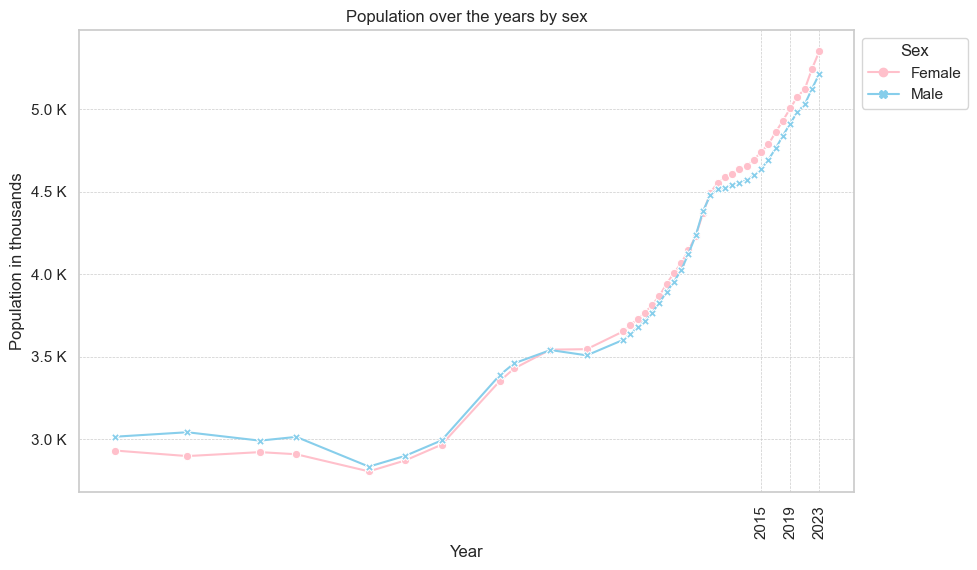

In [90]:
filtered_pivot_table = population_df[population_df['Sex'] != 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='Value_in_thousands', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in thousands')
plt.title('Population over the years by sex')

xticks = [years[0], years[-1]] + list(range(years[0] + tick_interval, years[-1], tick_interval))
plt.xticks(xticks, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [91]:
#if we want to include the objects we need the following but in our dataframe this doesn't give us a lot of useful information
population_df.describe(include=object)

,Age category,Single Year of Age,Sex category,Sex,UNIT
count,11817,11817,11817,11817,11817
unique,101,101,3,3,1
top,-,All ages,-,Both sexes,Number
freq,117,117,3939,3939,11817


In [92]:
#two methods to check if we have some null/missing values
#population_df.isnull().sum()
population_df.isna().sum()

Year                  0
Age category          0
Single Year of Age    0
Sex category          0
Sex                   0
UNIT                  0
VALUE                 0
Value_in_thousands    0
dtype: int64

In [93]:
population_df[population_df['VALUE'].isna()]

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands


In [94]:
#we will clean some of the columns as they won't be useful for our analysis

#to_drop = ['STATISTIC Label', 'STATISTIC', 'TLIST(A1)', 'C02076V03371', 'C02199V02655']

#population_df.drop(to_drop, inplace=True, axis=1)

In [95]:
population_df.head()

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands
0,1926,-,All ages,-,Both sexes,Number,2971992,2972.00
1,1926,-,All ages,1,Male,Number,1506889,1506.90
2,1926,-,All ages,2,Female,Number,1465103,1465.10
3,1926,200,Under 1 year,-,Both sexes,Number,55391,55.40
4,1926,200,Under 1 year,1,Male,Number,28084,28.10


In [96]:
#checking all unique values we have for the Year column (integer)
population_df['Year'].unique()

array([1926, 1936, 1946, 1951, 1961, 1966, 1971, 1979, 1981, 1986, 1991,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [97]:
#we will be looking at the data only for the past 20 years, so we would need to filter out the data so we create a new DataFrame which will have data from 2013 onwards
population_last_10_years_df = population_df[(population_df['Year'] > 2002)]

In [98]:
#confirming that we've filtered out the data
population_last_10_years_df.head()

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Value_in_thousands
5454,2003,-,All ages,-,Both sexes,Number,3979853,3979.90
5455,2003,-,All ages,1,Male,Number,1976914,1976.90
5456,2003,-,All ages,2,Female,Number,2002939,2002.90
5457,2003,200,Under 1 year,-,Both sexes,Number,60454,60.50
5458,2003,200,Under 1 year,1,Male,Number,31047,31.00


In [99]:
#checking all unique appearances in the Sex column
population_last_10_years_df['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [100]:
sex_totals = population_last_10_years_df.groupby('Sex')['VALUE'].sum().reset_index()

print(sex_totals)

          Sex      VALUE
0  Both sexes  194842680
1      Female   98156914
2        Male   96685766


In [101]:
pivot_table = population_last_10_years_df.pivot_table(index=['Year', 'Sex'], values='VALUE', aggfunc='sum')

# Reset index to make 'Year' and 'Sex' regular columns
pivot_table.reset_index(inplace=True)

print(pivot_table)

    Year         Sex     VALUE
0   2003  Both sexes   7959706
1   2003      Female   4005878
2   2003        Male   3953828
3   2004  Both sexes   8090376
4   2004      Female   4066548
..   ...         ...       ...
58  2022      Female   5244024
59  2022        Male   5123908
60  2023  Both sexes  10563224
61  2023      Female   5350884
62  2023        Male   5212340

[63 rows x 3 columns]


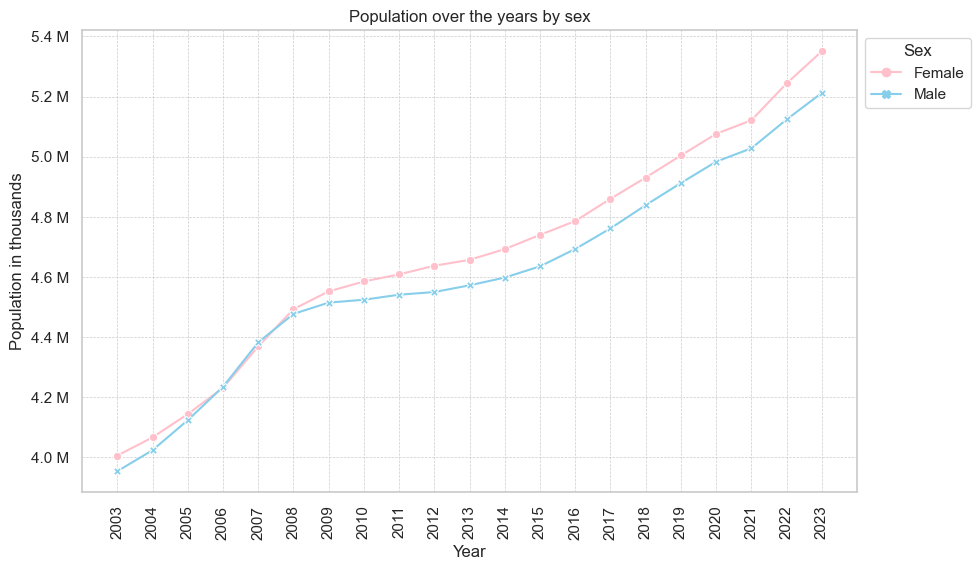

In [102]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] != 'Both sexes']
pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in thousands')
plt.title('Population over the years by sex')

tick_positions = range(int(pivot_table.index.min()), int(pivot_table.index.max()) + 1)
plt.xticks(tick_positions, tick_positions, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In the graprh representation above we can cleary see that the population of Ireland both for male and female has been increasing for the last ten years which automatically means that the population in general is increasing, which can be seen in the graph below.

Please keep in mind that those values are in thousands, which gives us a total of around 5.3 Million people in total for 2023. 

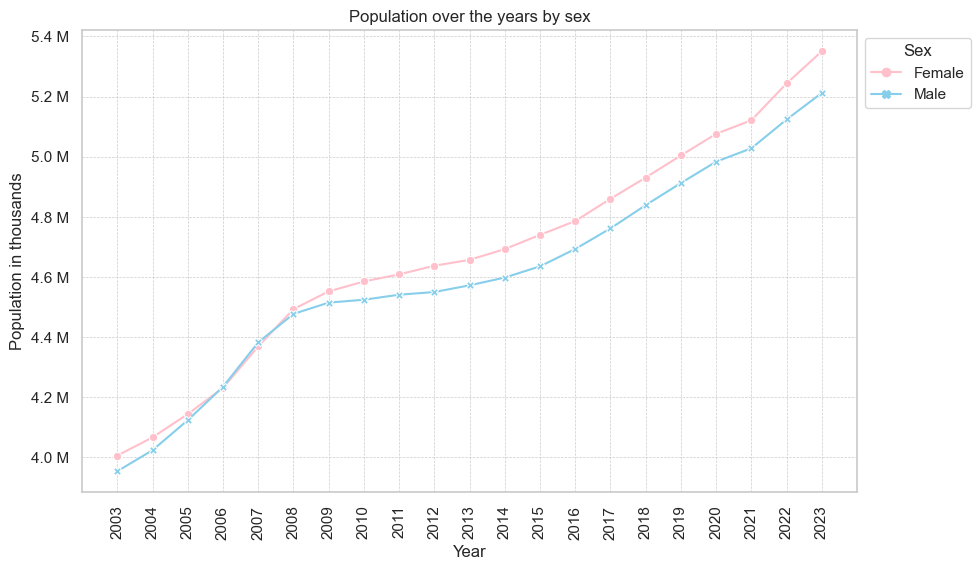

In [103]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] != 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in thousands')
plt.title('Population over the years by sex')

tick_positions = range(int(pivot_table.index.min()), int(pivot_table.index.max()) + 1)
plt.xticks(tick_positions, tick_positions, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


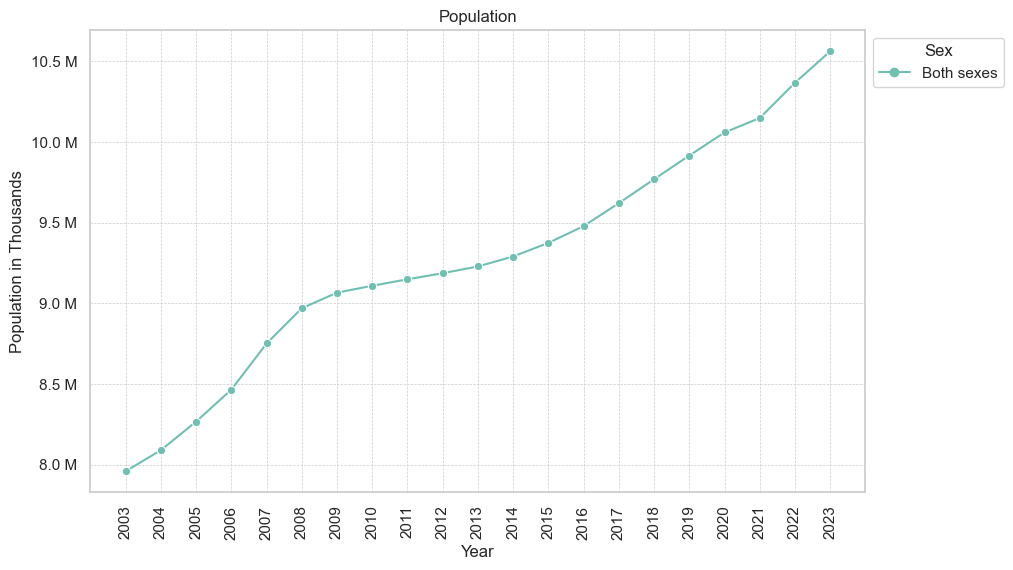

In [104]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] == 'Both sexes']

pivot_table_migration = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Both sexes': '#70c0b2'}

# Create the line plot
sns.lineplot(data=pivot_table_migration, palette = custom_palette , markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in Thousands')
plt.title('Population')

tick_positions = range(int(pivot_table_migration.index.min()), int(pivot_table_migration.index.max()) + 1)
plt.xticks(tick_positions, tick_positions, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()